<a href="https://colab.research.google.com/github/pin94/tensorflow-intro/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#get the data and split it to training and test datasets
(train_images, train_labels),(test_images,test_labels) = tf.keras.datasets.mnist.load_data()

In [ ]:
#scale down the value of the pixels from 0-225 to 0-1
train_images=train_images/255.0
test_images=test_images/255.0

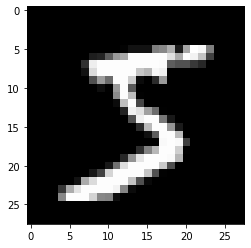

In [ ]:
#visualise the data
train_images.shape
test_images.shape
train_labels

#display the first image
plt.imshow(train_images[0],cmap='gray')
plt.show()

In [ ]:
# define the neural network model
my_model=tf.keras.models.Sequential()
my_model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
my_model.add(tf.keras.layers.Dense(128,activation='relu'))
my_model.add(tf.keras.layers.Dense(10,activation='softmax'))

# compile the model
my_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# train the model
my_model.fit(train_images,train_labels,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1458 - accuracy: 0.7241
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4742 - accuracy: 0.8752
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3753 - accuracy: 0.8965
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3364 - accuracy: 0.9054
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3138 - accuracy: 0.9100


In [ ]:
# check the model accuracy on the test data
val_loss,val_acc=my_model.evaluate(test_images,test_labels)
print('Test accuracy: ',val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 15403.8877 - accuracy: 0.7926
Test accuracy:  0.7925999760627747


In [ ]:
# save the nod
my_model.save('my_nmist_model')

In [ ]:
# load the model from file system
my_new_model=tf.keras.models.load_model('my_nmist_model')

In [ ]:
# check the new model for accuracy on the test data
new_val_loss,new_val_acc=my_new_model.evaluate(test_images,
                                                test_labels)
print('New test accuracy: ',new_val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 15403.8877 - accuracy: 0.7926
New test accuracy:  0.7925999760627747
